In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

/Users/mahesyoga/tf-arm-venv/bin/python


In [5]:
# Import libraries
import tensorflow as tf
from tensorflow import keras

In [6]:
# Load the MNIST dataset(handwritten digits)
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
import matplotlib.pyplot as plt

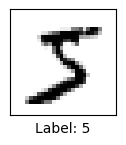

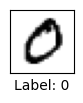

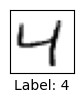

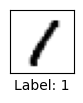

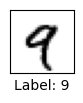

In [17]:
plt.figure(figsize=(8,8))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"Label: {y_train[i]}")
    plt.show()

In [9]:
# Normalize the data (convert values from 0-255 to 0-1 range)
x_train, x_test = x_train/255.0, x_test/255.0

In [10]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # Flatten 28x28 images into 784 vector
    keras.layers.Dense(128, activation='relu'),  # Dense hidden layer with 128 neurons
    keras.layers.Dropout(0.2),                   # Dropout for regularization
    keras.layers.Dense(10, activation='softmax') # Output layer: 10 classes (digits 0-9)
])

/Users/mahesyoga/tf-arm-venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-12 22:50:57.444286: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-12 22:50:57.444524: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-12 22:50:57.444542: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-12 22:50:57.444790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-12 22:50:57.444827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localh

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2025-05-12 22:55:04.087639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8346 - loss: 0.5571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8924 - loss: 0.3788
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8883 - loss: 0.4011
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8868 - loss: 0.4127
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8863 - loss: 0.4112


In [15]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9132 - loss: 0.3227


In [16]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9132000207901001
